In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_set = pd.read_csv("../input/titanic/train.csv")
test_set = pd.read_csv("../input/titanic/test.csv")


In [3]:
print("train set{}".format(train_set.info()))
print("-----------------------------------------")
print("test set{}".format(test_set.info()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
train setNone
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

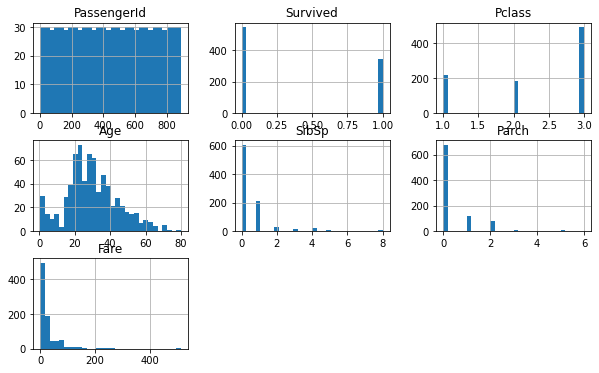

In [4]:
train_set.hist(bins = 30 , figsize=(10,6))

In [5]:
# Checking if data balanced

x = train_set[train_set["Survived"] == 0].count()[0]
y = train_set[train_set["Survived"] == 1].count()[0]

print("number of dead pepole: {}".format(x))
print("number of survived pepole: {}".format(y))
print(x+y)

number of dead pepole: 549
number of survived pepole: 342
891


<AxesSubplot:>

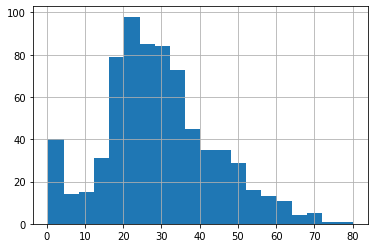

In [6]:
train_set["Age"].hist(bins = 20)

In [7]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


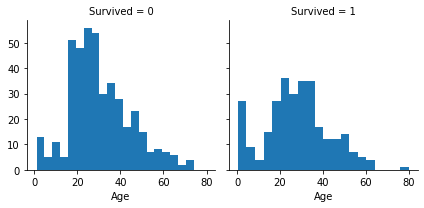

In [8]:
# 1 survived 0 Die

g = sns.FacetGrid(train_set, col='Survived')
g.map(plt.hist, 'Age', bins=20)

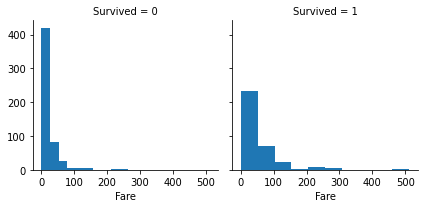

In [9]:
g = sns.FacetGrid(train_set , col="Survived")
g.map(plt.hist , "Fare")

In [10]:
# people with higher class better chance to survive

train_set[['Pclass', 'Survived']].groupby(['Pclass']).mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
train_set[["Sex" , "Survived"]].groupby(["Sex"]).mean()

,Survived
Sex,
female,0.742038
male,0.188908


# Dealing with missing values

In [12]:
train_set.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
print("age mean - train data: {}".format(train_set["Age"].mean()))
print("age mean - test data: {}".format(test_set["Age"].mean()))

age mean - train data: 29.69911764705882
age mean - test data: 30.272590361445783


<AxesSubplot:>

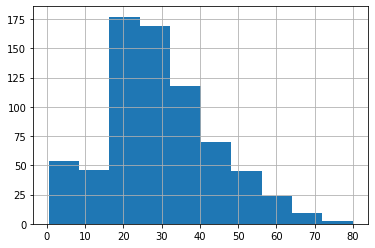

In [15]:
train_set["Age"].hist()

In [16]:
train_set["Age"] = train_set["Age"].fillna(train_set["Age"].mean())

test_set["Age"] = test_set["Age"].fillna(test_set["Age"].mean())

<AxesSubplot:>

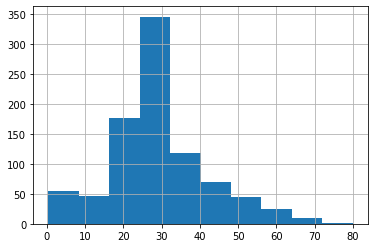

In [17]:
train_set["Age"].hist()

In [18]:
train_set[["Embarked"]] =train_set[["Embarked"]].fillna("S")

In [19]:
test_set["Fare"] = test_set["Fare"].fillna(test_set["Fare"].mean())


In [20]:
train_set.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [21]:
test_set.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# Normlaize train set

<AxesSubplot:>

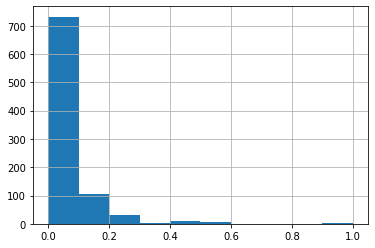

In [22]:
column = 'Fare'
train_set[column] = (train_set[column] - train_set[column].min()) / (train_set[column].max() - train_set[column].min())
train_set[column].hist()


<AxesSubplot:>

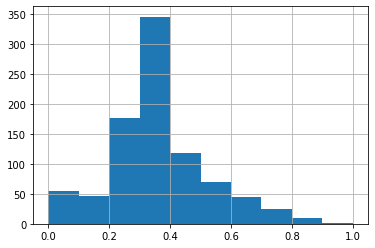

In [23]:
column = 'Age'
train_set[column] = (train_set[column] - train_set[column].min()) / (train_set[column].max() - train_set[column].min())
train_set[column].hist()

# 

# Normlaize test set

In [24]:
test_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot:>

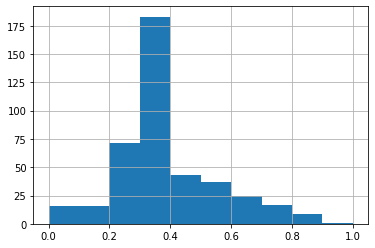

In [25]:
column = 'Age'
test_set[column] = (test_set[column] - test_set[column].min()) / (test_set[column].max() - test_set[column].min())
test_set[column].hist()

<AxesSubplot:>

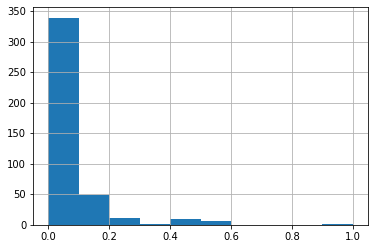

In [26]:
column = 'Fare'
test_set[column] = (test_set[column] - test_set[column].min()) / (test_set[column].max() - test_set[column].min())
test_set[column].hist()

# Drop columns

In [27]:
train_set =train_set.drop(['PassengerId', 'Cabin','Name','Ticket'], axis=1)

test_set =test_set.drop(['Cabin','Name','Ticket'], axis=1)

# validation_set = test_set.drop(["PassengerId"] , axis = 1)


In [28]:
train_set = pd.get_dummies(train_set)

test_set = pd.get_dummies(test_set)

# validation_set = pd.get_dummies(validation_set)



In [29]:
x_train = train_set.drop(["Survived"], axis=1)
y_train = train_set["Survived"]

In [30]:
from sklearn.model_selection import train_test_split

xx_train, xx_validation, yy_train, yy_validation =train_test_split(x_train, y_train, test_size=0.1, random_state=0)


In [31]:
print("x-train {}".format(xx_train.shape))
print("y-train {}".format(yy_train.shape))
print("x-validation {}".format(xx_validation.shape))
print("y-validation {}".format(yy_validation.shape))


x-train (801, 10)
y-train (801,)
x-validation (90, 10)
y-validation (90,)


# Models

In [32]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score



In [33]:

clf_ada = AdaBoostClassifier()

param_dist = {"n_estimators": [10, 100, 200, 400],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}


# Run a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(clf_ada, param_distributions=param_dist)

sk_fold=StratifiedKFold(n_splits=2)

scores=cross_val_score(ada_search,xx_train,yy_train,cv=sk_fold)

print(scores)
print(np.mean(scores))

[0.7755611 0.81     ]
0.792780548628429


In [34]:

ada_search.fit(xx_train,yy_train)



RandomizedSearchCV(estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5, 1, 2, 10,
                                                          20],
                                        'n_estimators': [10, 100, 200, 400]})

In [35]:
print(ada_search.score(xx_validation,yy_validation))


0.8111111111111111


In [36]:
from sklearn.model_selection import RandomizedSearchCV



rfc = RandomForestClassifier()

param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, xx_train.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist)



from sklearn.model_selection import StratifiedKFold

sk_fold=StratifiedKFold(n_splits=3)

scores=cross_val_score(random_search,xx_train,yy_train,cv=sk_fold)


print(scores)
print(np.mean(scores))



[0.80524345 0.85393258 0.83146067]
0.8302122347066166


In [37]:
random_search.fit(xx_train,yy_train)


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                           

In [38]:
print(random_search.score(xx_validation,yy_validation))


0.8333333333333334


In [39]:
test_data_me = test_set.drop(["PassengerId"] , axis = 1)
test_data_me = pd.get_dummies(test_data_me)
y_pred = random_search.predict(test_data_me)


In [40]:
final_dict = {'PassengerId': test_set["PassengerId"], 'Survived':y_pred}

df = pd.DataFrame(final_dict)
print(df.isna().any())
df.to_csv('submission.csv', index=False)

PassengerId    False
Survived       False
dtype: bool
